# Linear Regression

### TASK 1: Data Analysis and Data Cleaning

In [13]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statistics

### Load the dataset into memory

In [14]:
bweight_data = pd.read_csv("baby-weights-dataset.csv")

### Computing mean, stdev, min, max, 25% percentile, median and 75% percentile of the dataset (BWEIGHT variable)

In [15]:
bweight_data.BWEIGHT.describe()

count    101400.000000
mean          7.258066
std           1.329461
min           0.187500
25%           6.625000
50%           7.375000
75%           8.062500
max          13.062500
Name: BWEIGHT, dtype: float64

### Histogram plot for the BWEIGHT variable


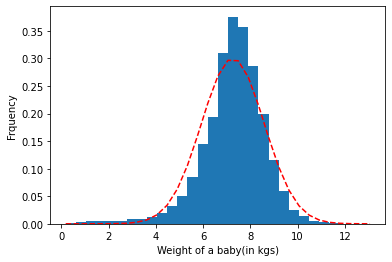

In [16]:
x = bweight_data["BWEIGHT"]
mu = 7.258066 #mean
sigma = 1.329461 #standard deviation
plt.xlabel("Weight of a baby(in kgs)")
plt.ylabel("Frquency")
n, bins, patches = plt.hist(x,30,density=True)
y = scipy.stats.norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--')
plt.show()


### Skewness and Kurtosis of the BWEIGHT

In [17]:
print("Kurtosis: "+ str(scipy.stats.kurtosis(x)))
print("Skewness: "+ str(scipy.stats.skew(x)))

Kurtosis: 2.868579195051929
Skewness: -0.9365796191651633


As the Skewness is -0.93 which is moderately skewed, this means the most of the babies weigh more than the mean.

### Introducing dummy variables

In [18]:
dummy = pd.get_dummies(bweight_data,columns=['HISPMOM','HISPDAD'],drop_first=True)

### Variable selection from the pool of 124 variables based on correlation score with the target variable BWEIGHT

In [19]:
T = dummy[dummy.columns[:]].corr()['BWEIGHT']
i = 0
train = pd.DataFrame()
for col in dummy:
    if(T[i] >= 0.04 or T[i] <=-0.04):
        t = dummy[col]
        train[col] = t
    i += 1
train = train.drop(columns = ['BWEIGHT'])

### Checking for missing data

In [20]:
dummy.isnull().sum()

ID           0
SEX          0
MARITAL      0
FAGE         0
GAINED       0
VISITS       0
MAGE         0
FEDUC        0
MEDUC        0
TOTALP       0
BDEAD        0
TERMS        0
LOUTCOME     0
WEEKS        0
RACEMOM      0
RACEDAD      0
CIGNUM       0
DRINKNUM     0
ANEMIA       0
CARDIAC      0
ACLUNG       0
DIABETES     0
HERPES       0
HYDRAM       0
HEMOGLOB     0
HYPERCH      0
HYPERPR      0
ECLAMP       0
CERVIX       0
PINFANT      0
PRETERM      0
RENAL        0
RHSEN        0
UTERINE      0
BWEIGHT      0
HISPMOM_M    0
HISPMOM_N    0
HISPMOM_O    0
HISPMOM_P    0
HISPMOM_S    0
HISPMOM_U    0
HISPDAD_M    0
HISPDAD_N    0
HISPDAD_O    0
HISPDAD_P    0
HISPDAD_S    0
HISPDAD_U    0
dtype: int64

### Randomly splitting the dataset into training, Tr (80%) and testing, Te (20%)

In [21]:
y = bweight_data["BWEIGHT"]
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(81120, 20) (81120,)
(20280, 20) (20280,)


### On the training dataset, applying a normalization technique

In [22]:
X_tr_norm = (X_train - X_train.min())/(X_train.max()-X_train.min())
y_tr_norm = (y_train - y_train.min())/(y_train.max()-y_train.min())
print(X_tr_norm.shape)
plt.figure(figsize=(20, 5))

features = ['VISITS','WEEKS', 'FAGE','GAINED']
target = y_tr_norm
'''
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = X_tr_norm[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('BWEIGHT')
'''

(81120, 20)


"\nfor i, col in enumerate(features):\n    plt.subplot(1, len(features) , i+1)\n    x = X_tr_norm[col]\n    y = target\n    plt.scatter(x, y, marker='o')\n    plt.title(col)\n    plt.xlabel(col)\n    plt.ylabel('BWEIGHT')\n"

<Figure size 1440x360 with 0 Axes>

### Applying the training data statistics to normalize the testing data as well.

In [23]:
X_te_norm = (X_test - X_test.min())/(X_test.max()-X_test.min())
y_te_norm = (y_test - y_test.min())/(y_test.max()-y_test.min())

### TASK 2: "Gradient Descent" function

In [24]:
def cal_cost(theta,X,y):
    m =len(y)
    predict = np.dot(X,theta)
    cost = (1/2*m) * np.sum(np.square(predict-y))
    return cost

def grad_desc(X,y,theta,learn_rate,itera):
    m =len(y)
    history_cost = np.zeros(itera)
    history_theta = np.zeros((itera,X.shape[1]))
    for i in range(itera):
        predict = np.dot(X,theta)
        theta = theta - (1/m)*learn_rate*(np.dot(np.transpose(X),(predict - y)))
        history_theta[i,:] = np.transpose(theta)
        history_cost[i] = cal_cost(theta,X,y)
    return theta, history_cost, history_theta


lr=0.01
it=10000
X_a = np.c_[np.ones((len(X_tr_norm),1)),X_tr_norm]
y_a = np.c_[y_tr_norm]
theta = np.random.randn(X_a.shape[1],1)
theta,cost_history,theta_history = grad_desc(X_a,y_a,theta,lr,it)


### Predicting BWEIGHT target variable for each of the testing dataset using the regression line and Calculating  RMSE (Root Mean Squared Error)

In [25]:
X = np.c_[np.ones((len(X_te_norm),1)),X_te_norm]
y_predict = np.dot(X,theta)
y_test = np.c_[y_te_norm]
rmse = np.sqrt(np.mean((y_test - y_predict)**2))
print(rmse)


0.9278963709025224


## Experiment With different Learning rate and epoch to decrease the RMSE

### Run linear regression one last time on the whole dataset  (i.e, training+testing which is preprocessed by you above).

In [26]:
lrt=0.001
itt=10000
y_t = bweight_data["BWEIGHT"]
X_norm = (train - train.min())/(train.max()-train.min())
y_norm = (y_t - y_t.min())/(y_t.max()-y_t.min())
X_b = np.c_[np.ones((len(X_norm),1)),X_norm]
y_b = np.c_[y_norm]
theta1 = np.random.randn(X.shape[1],1)
theta1,cost_history1,theta_history1 = grad_desc(X_b,y_b,theta1,lrt,itt)


### Preprocess the judge-without-label.csv file to predict the baby weights

In [27]:
data = pd.read_csv("judge-without-labels.csv")
dum = pd.get_dummies(data,columns=['HISPMOM','HISPDAD'],drop_first=True)
test = pd.DataFrame()
for col in train:
    t1 = dum[col]
    test[col] = t1
    
test_norm = (test - test.min())/(test.max()-test.min())

X_t = np.c_[np.ones((len(test_norm),1)),test_norm]
y_predic = np.dot(X_t,theta1)


### Predict BWEIGHT for each of the samples from the judge-without-label.csv file, and saving the results in judge-run.csv in the format below.

In [28]:
# Actual weight = min_weight + y_predic*(max_weight - min_weight)
# bweight min = 0.1875, bweight max = 13.0625 from the above 
a = 0.187500 + y_predic*(13.0625-0.1875) 
jud_df = pd.DataFrame(data = np.arange(len(a)),columns=["ID"],index=None,)
jud_df['BWEIGHT'] = a
jud_df.to_csv("judge-run.csv",index=False)